In [22]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Salary_Data.csv")
X = df["YearsExperience"].values
y = df["Salary"].values

In [5]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [6]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

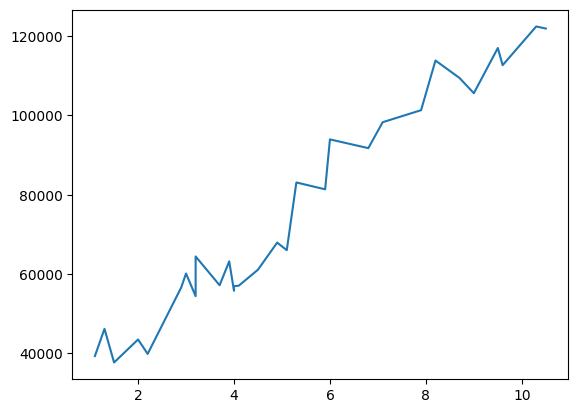

In [7]:
plt.plot(X,y)

In [8]:
X = np.array(X)
y = np.array(y)

In [10]:
def mean(X):
    return np.sum(X)/len(X)

In [11]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [12]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X-mean_value)/np.sqrt(variance_value)

In [13]:
X_norm = norm(X)

In [14]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

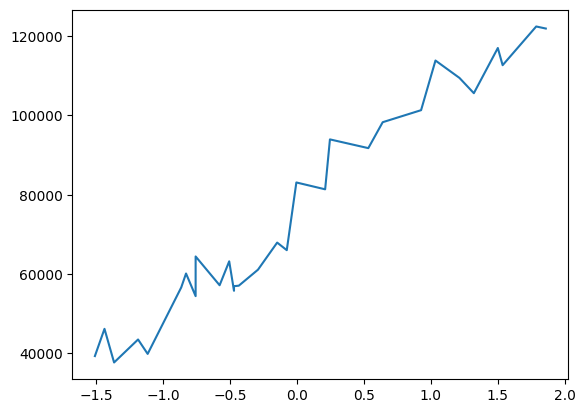

In [15]:
plt.plot(X_norm,y)

In [27]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self,X):
        return self.weight*X + self.bias
    def fit(self, X, y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = y-y_pred
        prev_loss = (1/(2*n))*np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n)*np.sum(errors*X)
            b_grad = (1/n)*np.sum(errors)
            self.weight += self.lr*w_grad
            self.bias += self.lr*b_grad
            y_pred = self.predict(X)
            errors = y-y_pred
            curr_loss = (1/(2*n))*np.sum(errors**2)
            if np.abs(curr_loss-prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X,y):
        y_pred = self.predict(X)
        plt.plot(X,y)
        plt.plot(X,y_pred)

In [28]:
model = SimpleLR()

In [29]:
loss_history = model.fit(X_norm, y)

In [30]:
loss_history

[np.float64(3251411842.4819236),
 np.float64(2636614332.8239746),
 np.float64(2138628350.0010355),
 np.float64(1735259703.9144561),
 np.float64(1408531100.5843256),
 np.float64(1143880931.8869202),
 np.float64(929514295.242022),
 np.float64(755877319.5596546),
 np.float64(615231369.256937),
 np.float64(501308149.51173574),
 np.float64(409030341.51812255),
 np.float64(334285317.043296),
 np.float64(273741847.21868646),
 np.float64(224701636.6607527),
 np.float64(184979066.10882646),
 np.float64(152803783.96176612),
 np.float64(126741805.42264722),
 np.float64(105631602.80596092),
 np.float64(88532338.686445),
 np.float64(74681934.74963711),
 np.float64(63463107.56082275),
 np.float64(54375857.53788307),
 np.float64(47015185.01930197),
 np.float64(41053040.27925131),
 np.float64(36223703.039810225),
 np.float64(32311939.875862956),
 np.float64(29143411.713065665),
 np.float64(26576903.901199855),
 np.float64(24498032.573588576),
 np.float64(22814146.798223406),
 np.float64(21450199.32017

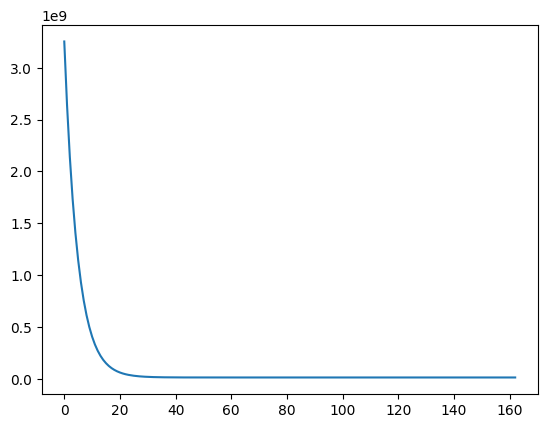

In [31]:
plt.plot(loss_history)

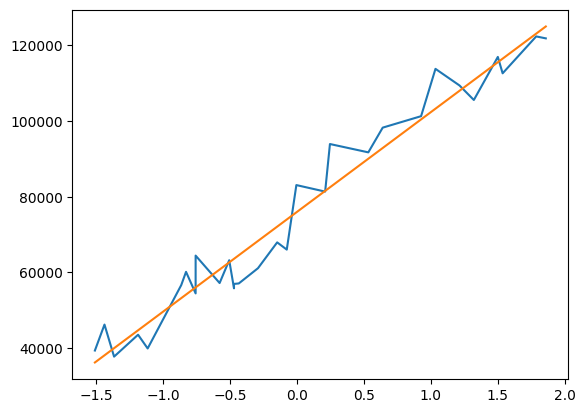

In [32]:
model.plot(X_norm,y)